In [1]:
from pandas_datareader import data as pdr
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY, date2num
from mpl_finance import candlestick_ohlc

In [14]:
import matplotlib.pyplot as plt
import fix_yahoo_finance as yf
import datetime as dt
import pandas as pd
import matplotlib.dates as mdates

In [3]:
yf.pdr_override()

In [8]:
c_start = dt.datetime(2012,1,1)
c_end = dt.datetime(2012,1,31)

try:
    data = pdr.get_data_yahoo("FB", start=c_start, end=c_end)
except ValueError:
    data = pd.read_csv('../07-Stock-Market-Analysis-Capstone-Project/Tesla_Stock.csv', index_col='Date', parse_dates=True)

[*********************100%***********************]  1 of 1 downloaded


In [9]:
quotes = []
for _, (d, o, c, h, l) in enumerate(zip(data.index, data['Open'], data['Close'], data['High'], data['Low'])):
    d = date2num(d)
    val = (d, o, c, h, l)
    #val = (d, o, h, l, c)
    quotes.append(val)

In [10]:
mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

ValueError: Invalid rrule byxxx generates an empty set.

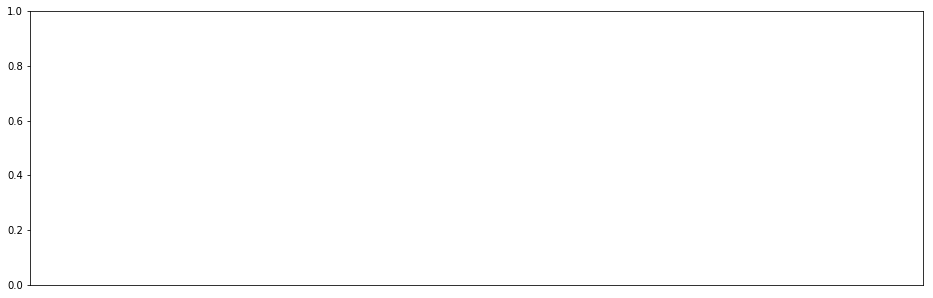

In [15]:
fig, ax = plt.subplots(figsize=(16,10))
fig.subplots_adjust(bottom=0.5)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
#ax.xaxis.set_major_formatter(dayFormatter)
ax.xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0,30], interval=30))

candlestick_ohlc(ax, quotes, width=0.5, alpha=1.0)

ax.xaxis_date()
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()